Shortcut          | Significado   
------------------|----------------
**CTRL + Enter**  | ejecutar celta 
**SHIFT + Enter** | ejecutar celda y pasar a siguiente
**ALT + Enter**   | ejecutar celda y crear una debajo

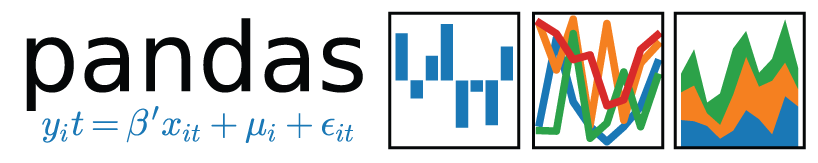

---

# Pandas II - funciones rolling y operaciones con DataFrames

_Se trabajará sobre los mismos datos que la introducción a pandas._

**Objetivos**
* Uso del método rolling para obtener resultados como la media móvil, la desviación típica móvil... 
* Agrupar datos usando `groupby`
* Pivotar tablas
---

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np

## Cargando los datos

La fuenta será un fichero de datos metereológicos de la Consejeria Agricultura, Pesca y Desarrollo Rural de Andalucía.

In [1]:
from IPython.display import HTML
HTML('<iframe src="http://www.juntadeandalucia.es/agriculturaypesca/ifapa/ria/servlet/FrontController?action=Static&url=coordenadas.jsp&c_provincia=4&c_estacion=4" width="700" height="400"></iframe>')

Para ver que tiene el fichero:

In [2]:
# en Linux
# !head ../data/tabernas_meteo_data.txt

In [4]:
# en Windows
!more ..\data\tabernas_meteo_data.txt

FECHA    DIA Al04TMax Al04TMin Al04TMed Al04Precip 
-------- --- -------- -------- -------- ---------- 

13-12-16 348     14.6      4.0      8.9        0.2 
12-12-16 347     15.9      3.0      8.7        0.2 
11-12-16 346     16.9      5.0     10.2        0.2 
10-12-16 345     16.4      6.3     10.9        0.2 
09-12-16 344     13.6      9.5     11.2        1.8 
08-12-16 343     14.5      5.4     10.4        0.0 
07-12-16 342     15.7      6.1     10.1        0.2 
06-12-16 341     17.7      7.1     13.4        0.0 
05-12-16 340     16.6      7.9     11.7        0.0 
04-12-16 339     11.8     10.1     10.9       23.8 
03-12-16 338     13.4      8.7     11.1        1.0 
02-12-16 337     17.2      5.5     10.8        0.0 
01-12-16 336     13.6      9.2     11.1        3.2 
30-11-16 335     14.0     10.7     12.1        0.0 
29-11-16 334     13.8      4.3      9.4        0.2 
28-11-16 333     13.9      5.5      9.0        0.0 
27-11-16 332     14.2      8.1     10.4        2.8 
26-11-16 33

14-12-12 349     17.9      1.8     10.0        0.2 
13-12-12 348     14.7      3.2      8.2        0.0 
12-12-12 347     14.0      3.4      7.8        0.2 
11-12-12 346     14.3      1.8      7.6        0.0 
10-12-12 345     15.5      0.0      7.1        0.0 
09-12-12 344     14.3      2.2      7.5        0.2 
08-12-12 343     18.2      3.7     10.0        0.2 
07-12-12 342     15.9      5.0      9.2        0.2 
06-12-12 341     12.2      0.4      5.7        0.0 
05-12-12 340     15.5      0.5      9.7        0.0 
04-12-12 339     18.2      0.7     10.0        0.0 
03-12-12 338     15.9     -1.8      5.5        0.2 
02-12-12 337     13.4     -2.3      4.3        0.0 
01-12-12 336     12.1     -2.5      3.7        0.0 
30-11-12 335     10.2     -1.6      3.9        0.0 
29-11-12 334     13.4      1.1      7.3        0.0 
28-11-12 333     12.8      2.9      8.3        0.0 
27-11-12 332     14.4      3.9      9.1        0.2 
26-11-12 331     17.7      7.4     12.1        0.0 
25-11-12 330

20-03-10  79     23.7     11.0     15.8        3.2 
19-03-10  78     21.7      7.7     13.4        0.0 
18-03-10  77     18.2      5.7     11.1        0.0 
17-03-10  76     16.5      2.6     10.2        0.2 
16-03-10  75     14.1      0.6      7.6        0.0 
15-03-10  74     13.9     -0.8      6.5        0.0 
14-03-10  73     11.4     -0.2      4.7        0.2 
13-03-10  72      9.2      3.9      6.7        0.0 
12-03-10  71     10.8      6.4      7.6        7.0 
11-03-10  70     11.9      0.3      6.9        0.8 
10-03-10  69     12.7     -0.6      5.9        0.0 
09-03-10  68     12.7      0.7      5.7        6.0 
08-03-10  67     16.0      4.3     10.7        4.4 
07-03-10  66     12.4      6.5      9.0        0.2 
06-03-10  65      8.7      6.5      7.8        2.6 
05-03-10  64     14.6      7.7     10.5        0.0 
04-03-10  63     19.6      0.0     14.9        1.0 
03-03-10  62     35.0      5.4     15.2        8.2 
02-03-10  61     14.0      6.0      9.0       19.4 
01-03-10  60

25-06-07 176     36.6     15.1     27.8        0.0 
24-06-07 175     30.1     15.1     23.0        0.0 
23-06-07 174     27.7     15.1     22.0        0.0 
22-06-07 173     30.2     15.9     23.3        0.0 
21-06-07 172     29.3     15.7     23.3        0.0 
20-06-07 171     32.3     14.0     24.9        0.0 
19-06-07 170     33.9     16.1     26.0        0.0 
18-06-07 169     30.7     18.4     24.9        0.0 
17-06-07 168     33.7     18.9     26.1        0.0 
16-06-07 167     32.3     16.1     24.4        0.0 
15-06-07 166     29.8     19.5     24.4        0.0 
14-06-07 165     33.1     15.3     25.7        0.0 
13-06-07 164     32.1     14.0     24.1        0.0 
12-06-07 163     31.9     15.5     23.0        0.0 
11-06-07 162     30.5     14.6     23.1        0.0 
10-06-07 161     29.0     14.9     21.9        0.0 
09-06-07 160     28.8     15.5     22.0        0.0 
08-06-07 159     30.2     13.2     22.6        0.0 
07-06-07 158     27.4     12.9     20.4        0.0 
06-06-07 157

28-09-04 272     26.1     12.8     18.9        0.0 
27-09-04 271     26.1     11.4     18.3        0.0 
26-09-04 270     24.4     12.6     19.0        0.0 
25-09-04 269     28.6     17.1     21.1        0.0 
24-09-04 268     33.1     15.6     23.9        0.0 
23-09-04 267     32.0     15.9     22.4        0.0 
22-09-04 266     34.6     14.7     22.8        0.0 
21-09-04 265     31.7     15.1     22.7        0.2 
20-09-04 264     29.2     15.8     21.6        0.0 
19-09-04 263     29.4     14.2     21.4        0.0 
18-09-04 262     28.8     15.0     20.7        0.0 
17-09-04 261     26.7     16.3     20.8        0.0 
16-09-04 260     26.8     18.0     21.8        0.0 
15-09-04 259     28.0     14.3     21.4        0.0 
14-09-04 258     31.5     15.1     22.1        0.0 
13-09-04 257     31.2     17.3     24.2        0.0 
12-09-04 256     32.5     18.1     25.3        0.0 
11-09-04 255     35.6     18.2     26.2        0.0 
10-09-04 254     33.3     20.2     24.9        0.0 
09-09-04 253

Se deben hacer los siguientes cambios:
* Separar los campos con espacios en blanco
* Descartar columna del día del año (no interesa)
* Saltar las dos primeras lineas (no interesan)
* Cambiar nombre a las columnas a otros más legibles
* Convertir las fechas al formato correcto

In [41]:
data = pd.read_csv("../data/tabernas_meteo_data.txt",
                    delim_whitespace=True,  # Separa los campos con espacios en blanco
                    usecols=(0, 2, 3, 4, 5),  # Selecciona las columnas interesantes
                    skiprows=2,  # Salta las dos primeras filas
                    names=['DATE', 'TMAX', 'TMIN', 'TMED', 'PRECIP'],  # Nombra las columnas
                    parse_dates=['DATE'],  # Cambia el formato de la fecha (lo parsea)
                    dayfirst=True,  # Cambia el orden de la fecha
                    index_col=['DATE'])  # Señala que el indexado se haga con la fecha (borra el actual)
data.head(5)

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-13,14.6,4.0,8.9,0.2
2016-12-12,15.9,3.0,8.7,0.2
2016-12-11,16.9,5.0,10.2,0.2
2016-12-10,16.4,6.3,10.9,0.2
2016-12-09,13.6,9.5,11.2,1.8


<div class="alert alert-info">Para el parseo de fechas: http://strftime.org/</div>

In [42]:
data.sort_index(inplace=True)  # Indexar de antiguo a moderno
data.head(3)

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2004-01-01,18.0,2.5,11.1,0.0
2004-01-02,17.4,5.7,10.6,0.0
2004-01-03,15.1,0.8,7.9,0.0


## Funciones "rolling"

Para visualizar, por ejemplo, la evolución de la temperatura media a lo lardo de los años 2014 y 2015:

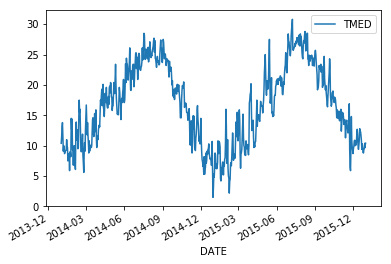

In [134]:
year14_year15 = data.loc['2014-01-01':'2015-12-31']
year14_year15.plot(y='TMED')  # o también year14_year15.TMED.plot()

Se puede apreciar la oscilación a lo largo del año. Sin embargo, las variaciones locales de temperatura de determinados días "ensucian" la representación. Una opción es "suavizar" la curva utilizando una media móvil.

Pandas proporciona métodos para calcular magnitudes como medias móviles usando el método `rolling`:

In [136]:
year14_year15.TMED.head(15)  # Media diaria (columna TMED)

DATE
2014-01-01    10.4
2014-01-02    11.4
2014-01-03    13.1
2014-01-04    13.8
2014-01-05    11.1
2014-01-06     9.1
2014-01-07    10.0
2014-01-08     9.3
2014-01-09     8.7
2014-01-10     8.9
2014-01-11     9.2
2014-01-12     9.2
2014-01-13     9.3
2014-01-14    11.0
2014-01-15     9.9
Name: TMED, dtype: float64

In [138]:
year14_year15.TMED.rolling(7, center=True).mean().dropna().head(10)  # Media centrada (semanal/mensual/trimestral)

DATE
2014-01-04    11.271429
2014-01-05    11.114286
2014-01-06    10.728571
2014-01-07    10.128571
2014-01-08     9.471429
2014-01-09     9.200000
2014-01-10     9.228571
2014-01-11     9.371429
2014-01-12     9.457143
2014-01-13     9.600000
Name: TMED, dtype: float64

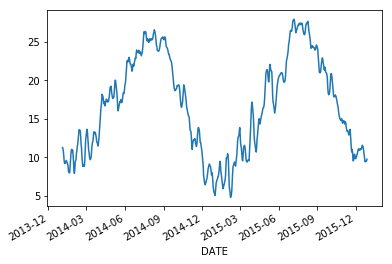

In [139]:
year14_year15.TMED.rolling(7, center=True).mean().plot()  # Plot

### Creación de nuevas columnas

Para añadir nuevas columnas:

In [144]:
data['year'] = data.index.year  # Crea la columna 'year'
data['month'] = data.index.month  # Crea la columna 'month'
data.head()

,TMAX,TMIN,TMED,PRECIP,year,month
DATE,,,,,,
2004-01-01,18.0,2.5,11.1,0.0,2004,1
2004-01-02,17.4,5.7,10.6,0.0,2004,1
2004-01-03,15.1,0.8,7.9,0.0,2004,1
2004-01-04,16.2,-0.4,7.2,0.0,2004,1
2004-01-05,16.4,0.6,7.1,0.0,2004,1


## Creando agrupaciones 

En muchas ocasiones se precisa agrupar datos en base a determinados valores como fechas o etiquetas (por ejemplo, datos que pertenecen a un mismo ensayo o lugar).

En este caso interesa, por ejemplo, obtener una representación del "mes típico" o "día típico". Se puede agrupar los datos utilizando `groupby`:

In [130]:
monthly = data.groupby(by=['year', 'month'])  # Crea la agrupación

Para visualizar los grupos creados:

In [149]:
monthly.groups.keys()

dict_keys([(2004, 1), (2004, 2), (2004, 3), (2004, 4), (2004, 5), (2004, 6), (2004, 7), (2004, 8), (2004, 9), (2004, 10), (2004, 11), (2004, 12), (2005, 1), (2005, 2), (2005, 3), (2005, 4), (2005, 5), (2005, 6), (2005, 7), (2005, 8), (2005, 9), (2005, 10), (2005, 11), (2005, 12), (2006, 1), (2006, 2), (2006, 3), (2006, 4), (2006, 5), (2006, 6), (2006, 7), (2006, 8), (2006, 9), (2006, 10), (2006, 11), (2006, 12), (2007, 1), (2007, 2), (2007, 3), (2007, 4), (2007, 5), (2007, 6), (2007, 7), (2007, 8), (2007, 9), (2007, 10), (2007, 11), (2007, 12), (2008, 1), (2008, 2), (2008, 3), (2008, 4), (2008, 5), (2008, 6), (2008, 7), (2008, 8), (2008, 9), (2008, 10), (2008, 11), (2008, 12), (2009, 1), (2009, 2), (2009, 3), (2009, 4), (2009, 5), (2009, 6), (2009, 7), (2009, 8), (2009, 9), (2009, 10), (2009, 11), (2009, 12), (2010, 1), (2010, 2), (2010, 3), (2010, 4), (2010, 5), (2010, 6), (2010, 7), (2010, 8), (2010, 9), (2010, 10), (2010, 11), (2010, 12), (2011, 1), (2011, 2), (2011, 3), (2011, 4), 

Con estos grupos se puede:

* Acceder a sus datos individualmente (por ejemplo, comprobar qué pasó cada día de marzo de 2016) 
* Realizar una reducción de datos, para comparar diversos grupos (por ejemplo caracterizar el tiempo de cada mes a lo largo de los años)

In [150]:
monthly.get_group((2016,3)).head()  # Acceder a un grupo

,TMAX,TMIN,TMED,PRECIP,year,month
DATE,,,,,,
2016-03-01,20.5,0.0,9.9,0.0,2016,3
2016-03-02,23.5,2.9,13.6,0.0,2016,3
2016-03-03,20.9,2.9,12.5,0.0,2016,3
2016-03-04,20.3,2.0,12.6,0.0,2016,3
2016-03-05,17.3,7.1,12.5,0.0,2016,3


In [155]:
monthly_mean = monthly.mean()  # Agregación de los datos
monthly_mean.head(24)

TMAX       TMIN       TMED    PRECIP
year month                                           
2004 1      17.603333   3.533333  10.003333  0.026667
     2      16.017241   4.672414   9.803448  0.531034
     3      17.074194   6.187097  11.370968  2.619355
     4      19.016667   7.043333  13.190000  3.233333
     5      21.283871  10.519355  15.883871  1.019355
     6      30.756667  15.916667  23.323333  0.206667
     7      31.664516  17.912903  24.758065  0.006452
     8      33.483871  19.003226  26.241935  0.000000
     9      30.066667  16.323333  22.656667  0.020000
     10     26.022581  11.600000  18.451613  0.122581
     11     18.056667   4.766667  10.920000  0.366667
     12     14.500000   3.790323   8.800000  1.606452
2005 1      14.587097  -0.067742   6.425806  0.090323
     2      12.728571   0.775000   6.746429  1.821429
     3      17.635484   5.574194  11.332258  0.858065
     4      21.910000   8.163333  15.043333  0.073333
     5      26.770968  12.035484  19.732258  0.109677
     6      30.710000  15.550000  23.743333  0.033333
     7      33.445161  17.996774  26.206452  0.000000
     8      32.193333  17.976667  24.706667  0.040000
     9      27.803333  14.303333  20.756667  0.553333
     10     23.900000  11.480645  17.235484  0.187097
     11     17.053333   5.550000  10.913333  0.793333
     12     14.856667   2.730000   8.610000  0.306667

### Pivotando tablas

En ocasiones es necesario tener los datos de forma diferente para usar determinadas funciones de `pandas`. Una necesidad típica es la de pivotar una tabla.

Por ejemplo, si se quiere acceder a los mismos datos que en el caso anterior, pero una fila para cada año y para cada variable (TMAX, TMED...) las temperaturas por mes en columnas:

In [168]:
reset_index = monthly_mean.reset_index()  # Reseteado del índice
reset_index.head()

,year,month,TMAX,TMIN,TMED,PRECIP
0,2004,1,17.603333,3.533333,10.003333,0.026667
1,2004,2,16.017241,4.672414,9.803448,0.531034
2,2004,3,17.074194,6.187097,11.370968,2.619355
3,2004,4,19.016667,7.043333,13.190000,3.233333
4,2004,5,21.283871,10.519355,15.883871,1.019355


In [169]:
# Años como índices, media mensual en cada columna
pivoted = reset_index.pivot(index='year', columns='month')
pivoted

TMAX                                                         \
month         1          2          3          4          5          6    
year                                                                      
2004   17.603333  16.017241  17.074194  19.016667  21.283871  30.756667   
2005   14.587097  12.728571  17.635484  21.910000  26.770968  30.710000   
2006   12.110000  14.322222  20.722581  22.333333  25.280000  28.386207   
2007   16.487097  18.100000  18.390323  17.993103  25.767742  29.579310   
2008   16.293548  15.262069  20.148387  21.960000  23.200000  28.720000   
2009   13.609677  14.625000  18.019355  20.546667  26.083871  32.066667   
2010   13.838710  23.364286  16.100000  20.033333  24.403226  28.783333   
2011   14.258065  17.007143  16.212903  22.090000  24.145161  29.216667   
2012   15.796774  14.134483  18.522581  21.576667  27.138710  32.576667   
2013   16.919355  15.725000  18.567742  21.280000  23.425806  27.976667   
2014   16.506452  17.542857  18.809677  24.886667  25.112903  29.033333   
2015   15.819355  14.014286  18.793548  20.103333  27.174194  29.250000   
2016   17.541935  17.251724  18.906452  21.500000  24.632258  30.540000   

                                                     ...       PRECIP  \
month         7          8          9          10    ...           3    
year                                                 ...                
2004   31.664516  33.483871  30.066667  26.022581    ...     2.619355   
2005   33.445161  32.193333  27.803333  23.900000    ...     0.858065   
2006   33.900000  31.990323  28.633333  25.483871    ...     0.070968   
2007   32.551613  31.764516  26.806667  21.919355    ...     0.625806   
2008   32.596774  32.380645  27.343333  21.548387    ...     0.464516   
2009   34.964516  32.367742  26.363333  25.945161    ...     1.425806   
2010   33.070968  33.067742  28.726667  23.980645    ...     2.548387   
2011   32.977419  33.687097  28.870000  24.216129    ...     1.012903   
2012   32.880645  35.754545  28.106667  23.506452    ...     0.025806   
2013   31.841935  31.716129  28.016667  26.603226    ...     1.141935   
2014   32.154839  32.645161  29.603333  25.287097    ...     0.122581   
2015   35.174194  32.203226  27.966667  23.664516    ...     1.374194   
2016   32.180645  30.929032  29.016667  24.567742    ...     0.167742   

                                                                             \
month        4         5         6         7         8         9         10   
year                                                                          
2004   3.233333  1.019355  0.206667  0.006452  0.000000  0.020000  0.122581   
2005   0.073333  0.109677  0.033333  0.000000  0.040000  0.553333  0.187097   
2006   1.960000  2.026667  0.351724  0.000000  0.000000  1.720000  0.232258   
2007   1.248276  0.251613  0.000000  0.000000  0.070968  2.133333  2.051613   
2008   0.120000  1.503226  0.093333  0.283871  0.000000  2.146667  3.296774   
2009   0.720000  0.103226  0.020000  0.000000  0.077419  1.306667  0.090323   
2010   0.486667  0.367742  0.853333  0.000000  0.032258  0.146667  0.677419   
2011   0.993333  1.606452  0.080000  0.000000  0.077419  0.573333  0.141935   
2012   0.013333  0.000000  0.006667  0.000000  0.000000  2.233333  0.787097   
2013   0.373333  0.574194  0.000000  0.000000  0.800000  0.673333  0.083871   
2014   0.013333  0.051613  0.580000  0.000000  0.000000  1.240000  0.664516   
2015   1.080000  0.103226  0.113333  0.012903  0.006452  1.160000  1.322581   
2016   0.126667  0.425806  0.006667  0.000000  0.032258  0.313333  0.567742   

                           
month        11        12  
year                       
2004   0.366667  1.606452  
2005   0.793333  0.306667  
2006   1.333333  0.322581  
2007   0.380000  1.280000  
2008   0.646667  0.000000  
2009   0.233333  3.503226  
2010   1.546667  1.877419  
2011   1.293333  0.458065  
2012   2.173333  0.058065  
2013   0.673333  0.683871  
2014   0.6333

La línea anterior es compleja, muestra la potencia de `pandas`, que lleva tiempo dominar. Se pasan muchas horas peleando contra problemas de este tipo, pero afortunadamente mucha gente lo ha pasado mal antes y su experiencia ha quedado plasmada en cientos de **preguntas de [Stack Overflow](https://stackoverflow.com/questions/tagged/pandas)** y en la **[documentación](http://pandas.pydata.org/pandas-docs/stable/) de pandas.**

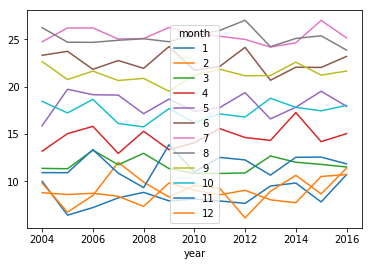

In [170]:
pivoted.TMED.plot()

## Visualizaciones especiales

### [scatter](https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot)

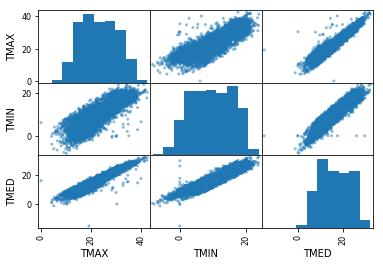

In [171]:
# scatter_matrix
from pandas.plotting import scatter_matrix
axes = scatter_matrix(data.loc[:, "TMAX":"TMED"])  # todas las filas (días), las (3) columnas entre 'TMAX' y 'TMED'

### [lag_plot ](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-lag)

Visualiza relaciones entre un elemento _n_ y su _n+lag_ siguiente, esto es, sirve para identificar el grado de _randomness_ (de una serie temporal por ejemplo) al plotear **y(t) contra y(t + lag)**

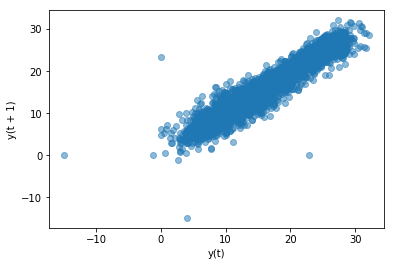

In [204]:
pd.plotting.lag_plot(data.TMED, lag=1, alpha=0.5)

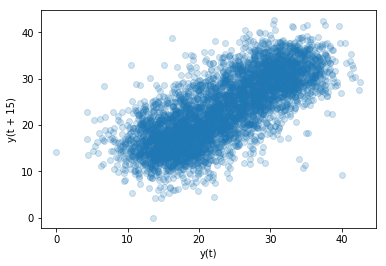

In [205]:
pd.plotting.lag_plot(data.TMAX, lag=15, alpha=0.2)

## Guardando y cargando datos en distintos formatos

### .csv

In [247]:
pivoted.to_csv('pivoted_en_csv.csv')
data_en_csv = pd.read_csv('pivoted_en_csv.csv')
data_en_csv

,Unnamed: 0,TMAX,TMAX.1,TMAX.2,TMAX.3,TMAX.4,TMAX.5,TMAX.6,TMAX.7,TMAX.8,...,PRECIP.2,PRECIP.3,PRECIP.4,PRECIP.5,PRECIP.6,PRECIP.7,PRECIP.8,PRECIP.9,PRECIP.10,PRECIP.11
0,month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000
1,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,17.603333,16.017241,17.074194,19.016667,21.283871,30.756667,31.664516,33.483871,30.066667,...,2.619355,3.233333,1.019355,0.206667,0.006452,0.000000,0.020000,0.122581,0.366667,1.606452
3,2005,14.587097,12.728571,17.635484,21.910000,26.770968,30.710000,33.445161,32.193333,27.803333,...,0.858065,0.073333,0.109677,0.033333,0.000000,0.040000,0.553333,0.187097,0.793333,0.306667
4,2006,12.110000,14.322222,20.722581,22.333333,25.280000,28.386207,33.900000,31.990323,28.633333,...,0.070968,1.960000,2.026667,0.351724,0.000000,0.000000,1.720000,0.232258,1.333333,0.322581
5,2007,16.487097,18.100000,18.390323,17.993103,25.767742,29.579310,32.551613,31.764516,26.806667,...,0.625806,1.248276,0.251613,0.000000,0.000000,0.070968,2.133333,2.051613,0.380000,1.280000
6,2008,16.293548,15.262069,20.148387,21.960000,23.200000,28.720000,32.596774,32.380645,27.343333,...,0.464516,0.120000,1.503226,0.093333,0.283871,0.000000,2.146667,3.296774,0.646667,0.000000
7,2009,13.609677,14.625000,18.019355,20.546667,26.083871,32.066667,34.964516,32.367742,26.363333,...,1.425806,0.720000,0.103226,0.020000,0.000000,0.077419,1.306667,0.090323,0.233333,3.503226
8,2010,13.838710,23.364286,16.100000,20.033333,24.403226,28.783333,33.070968,33.067742,28.726667,...,2.548387,0.486667,0.367742,0.853333,0.000000,0.032258,0.146667,0.677419,1.546667,1.877419
9,2011,14.258065,17.007143,16.212903,22.090000,24.145161,29.216667,32.977419,33.687097,28.870000,...,1.012903,0.993333,1.606452,0.080000,0.000000,0.077419,0.573333,0.141935,1.293333,0.458065


### excel (.xlsx)

In [248]:
pivoted.to_excel('pivoted_en_excel.xlsx')
data_en_excel = pd.read_excel('pivoted_en_excel.xlsx')
data_en_excel

,TMAX,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,17.603333,16.017241,17.074194,19.016667,21.283871,30.756667,31.664516,33.483871,30.066667,26.022581,...,2.619355,3.233333,1.019355,0.206667,0.006452,0.000000,0.020000,0.122581,0.366667,1.606452
2005,14.587097,12.728571,17.635484,21.910000,26.770968,30.710000,33.445161,32.193333,27.803333,23.900000,...,0.858065,0.073333,0.109677,0.033333,0.000000,0.040000,0.553333,0.187097,0.793333,0.306667
2006,12.110000,14.322222,20.722581,22.333333,25.280000,28.386207,33.900000,31.990323,28.633333,25.483871,...,0.070968,1.960000,2.026667,0.351724,0.000000,0.000000,1.720000,0.232258,1.333333,0.322581
2007,16.487097,18.100000,18.390323,17.993103,25.767742,29.579310,32.551613,31.764516,26.806667,21.919355,...,0.625806,1.248276,0.251613,0.000000,0.000000,0.070968,2.133333,2.051613,0.380000,1.280000
2008,16.293548,15.262069,20.148387,21.960000,23.200000,28.720000,32.596774,32.380645,27.343333,21.548387,...,0.464516,0.120000,1.503226,0.093333,0.283871,0.000000,2.146667,3.296774,0.646667,0.000000
2009,13.609677,14.625000,18.019355,20.546667,26.083871,32.066667,34.964516,32.367742,26.363333,25.945161,...,1.425806,0.720000,0.103226,0.020000,0.000000,0.077419,1.306667,0.090323,0.233333,3.503226
2010,13.838710,23.364286,16.100000,20.033333,24.403226,28.783333,33.070968,33.067742,28.726667,23.980645,...,2.548387,0.486667,0.367742,0.853333,0.000000,0.032258,0.146667,0.677419,1.546667,1.877419
2011,14.258065,17.007143,16.212903,22.090000,24.145161,29.216667,32.977419,33.687097,28.870000,24.216129,...,1.012903,0.993333,1.606452,0.080000,0.000000,0.077419,0.573333,0.141935,1.293333,0.458065


### .h5

In [249]:
pivoted.to_hdf('pivoted_en_hdf.h5','pivoted')
data_en_h5 = pd.read_hdf('pivoted_en_hdf.h5')
data_en_h5

TMAX                                                         \
month         1          2          3          4          5          6    
year                                                                      
2004   17.603333  16.017241  17.074194  19.016667  21.283871  30.756667   
2005   14.587097  12.728571  17.635484  21.910000  26.770968  30.710000   
2006   12.110000  14.322222  20.722581  22.333333  25.280000  28.386207   
2007   16.487097  18.100000  18.390323  17.993103  25.767742  29.579310   
2008   16.293548  15.262069  20.148387  21.960000  23.200000  28.720000   
2009   13.609677  14.625000  18.019355  20.546667  26.083871  32.066667   
2010   13.838710  23.364286  16.100000  20.033333  24.403226  28.783333   
2011   14.258065  17.007143  16.212903  22.090000  24.145161  29.216667   
2012   15.796774  14.134483  18.522581  21.576667  27.138710  32.576667   
2013   16.919355  15.725000  18.567742  21.280000  23.425806  27.976667   
2014   16.506452  17.542857  18.809677  24.886667  25.112903  29.033333   
2015   15.819355  14.014286  18.793548  20.103333  27.174194  29.250000   
2016   17.541935  17.251724  18.906452  21.500000  24.632258  30.540000   

                                                     ...       PRECIP  \
month         7          8          9          10    ...           3    
year                                                 ...                
2004   31.664516  33.483871  30.066667  26.022581    ...     2.619355   
2005   33.445161  32.193333  27.803333  23.900000    ...     0.858065   
2006   33.900000  31.990323  28.633333  25.483871    ...     0.070968   
2007   32.551613  31.764516  26.806667  21.919355    ...     0.625806   
2008   32.596774  32.380645  27.343333  21.548387    ...     0.464516   
2009   34.964516  32.367742  26.363333  25.945161    ...     1.425806   
2010   33.070968  33.067742  28.726667  23.980645    ...     2.548387   
2011   32.977419  33.687097  28.870000  24.216129    ...     1.012903   
2012   32.880645  35.754545  28.106667  23.506452    ...     0.025806   
2013   31.841935  31.716129  28.016667  26.603226    ...     1.141935   
2014   32.154839  32.645161  29.603333  25.287097    ...     0.122581   
2015   35.174194  32.203226  27.966667  23.664516    ...     1.374194   
2016   32.180645  30.929032  29.016667  24.567742    ...     0.167742   

                                                                             \
month        4         5         6         7         8         9         10   
year                                                                          
2004   3.233333  1.019355  0.206667  0.006452  0.000000  0.020000  0.122581   
2005   0.073333  0.109677  0.033333  0.000000  0.040000  0.553333  0.187097   
2006   1.960000  2.026667  0.351724  0.000000  0.000000  1.720000  0.232258   
2007   1.248276  0.251613  0.000000  0.000000  0.070968  2.133333  2.051613   
2008   0.120000  1.503226  0.093333  0.283871  0.000000  2.146667  3.296774   
2009   0.720000  0.103226  0.020000  0.000000  0.077419  1.306667  0.090323   
2010   0.486667  0.367742  0.853333  0.000000  0.032258  0.146667  0.677419   
2011   0.993333  1.606452  0.080000  0.000000  0.077419  0.573333  0.141935   
2012   0.013333  0.000000  0.006667  0.000000  0.000000  2.233333  0.787097   
2013   0.373333  0.574194  0.000000  0.000000  0.800000  0.673333  0.083871   
2014   0.013333  0.051613  0.580000  0.000000  0.000000  1.240000  0.664516   
2015   1.080000  0.103226  0.113333  0.012903  0.006452  1.160000  1.322581   
2016   0.126667  0.425806  0.006667  0.000000  0.032258  0.313333  0.567742   

                           
month        11        12  
year                       
2004   0.366667  1.606452  
2005   0.793333  0.306667  
2006   1.333333  0.322581  
2007   0.380000  1.280000  
2008   0.646667  0.000000  
2009   0.233333  3.503226  
2010   1.546667  1.877419  
2011   1.293333  0.458065  
2012   2.173333  0.058065  
2013   0.673333  0.683871  
2014   0.6333

---
**Se ha aprendido**
* A utilizar las funciones rolling
* A agrupar datos de un DataFrame utilizando sus columnas:
  - A agrupar con más de una variable
  - A acceder a distintos grupos
  - A obtener una reducción de datos para cada grupo
* A utilizar algunas representaciones especiales
* A salvar los datos
---
**Referencias**

* [Notebooks](https://github.com/PyDataMadrid2016/Conference-Info/blob/master/workshops_materials/20160408_1100_Pandas_for_beginners/tutorial/Tutorial%2005%20-%20Combinando-Agrupando-Agregando.ipynb) de Kiko Correoso

---
[@AeroPython](https://github.com/aeropython): Juan Luis Cano, Alejandro Sáez, Mabel Delgado, Kiko Correoso, Andrés Quezada